# DIAMOND PRICE PREDICTION

# Abstract

# Index

1. Importing Libraries
2. Understanding the Data
3. Data Cleaning
4. EDA
5. Linear Regression Modeling
6. Predicting Prices

# 1. Importing Libraries

In [204]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 2. Understanding the Data

Each row of the DataFrame represents a diamond and the Columns are the attributes of these diamonds.

Description of the data:

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

Here the price is our main target. We will analyse the data and train a model to predict prices of another DataFrame.

## The 4 "C"s of a diamond:

<img src="images/4Cs.jpg" style="width: 543;"/>

<b>CUT:</b> The quality of the cut is measured by its Proportion, Symmetry and Final Polish. It represents how well a diamond refracts and reflects light.

<b>COLOR:</b> A diamond has many hues and this DataSet has only the High Quality types of colors. The scale goes from "D" (best) to "Z" (Worst), but diamonds with colors from "K" to "Z" are called tinted and are not represented in this DataSet.

<b>CLARITY:</b> Diamonds have characteristics known as inclusions (internal) and blemishes (external). Diamons without inclusions or blemishes are rare.

<b>CARAT:</b> Carat represents the weight of a diamond. 1 carat = 0.2 grams. It is expected that the heavier the diamond, the higher its price.

# 3. Data Cleaning

In [205]:
diamonds = pd.read_csv('data/asset-v1_IRONHACK+DAFT+202007_SAO+type@asset+block@diamonds.csv')

Let's take a look at the statistics of the data

In [206]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [207]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48940.0,0.797817,0.474126,0.2,0.40,0.70,1.04,5.01
depth,48940.0,61.751931,1.430026,43.0,61.00,61.80,62.50,79.00
table,48940.0,57.451161,2.233450,43.0,56.00,57.00,59.00,95.00
price,48940.0,3934.409644,3989.333861,326.0,949.00,2401.00,5331.25,18823.00
x,48940.0,5.730712,1.121920,0.0,4.71,5.69,6.54,10.74
y,48940.0,5.734333,1.145344,0.0,4.72,5.71,6.54,58.90
z,48940.0,3.538648,0.706817,0.0,2.91,3.52,4.04,31.80


Since the variables 'x', 'y' and 'z' are measures of the diamond, it is not acceptable to have zeros. So, let's clear this data

In [208]:
mask = mask = (diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)
diamonds[mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [209]:
mask_0 = mask_0 = (diamonds['x'] != 0) & (diamonds['y'] != 0) & (diamonds['z'] == 0)
diamonds_0 = diamonds[mask_0]

def calculate_z(z):
    z = diamonds_0['depth']*(diamonds_0['x']+diamonds_0['y'])/200
    diamonds_0['z'] = round(z, 2)
    return diamonds_0['z']

diamonds_0['z'].apply(calculate_z)

diamonds[mask_0] = diamonds_0

diamonds[mask_0]

C:\Users\mathe\AppData\Local\Temp/ipykernel_18320/2376418458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_0['z'] = round(z, 2)


,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,3.85
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,3.85
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,4.09
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,3.84
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,4.54
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,4.06
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,5.03
23691,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,5.19
24573,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,5.14
24934,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,5.01


Now, let's drop the values we cannot calculate

In [210]:
diamonds['z'].replace(to_replace=0, value=np.nan, inplace=True)
diamonds['x'].replace(to_replace=0, value=np.nan, inplace=True)
diamonds['y'].replace(to_replace=0, value=np.nan, inplace=True)
diamonds = diamonds.dropna()

In [211]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48933 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48933 non-null  float64
 1   cut      48933 non-null  object 
 2   color    48933 non-null  object 
 3   clarity  48933 non-null  object 
 4   depth    48933 non-null  float64
 5   table    48933 non-null  float64
 6   price    48933 non-null  int64  
 7   x        48933 non-null  float64
 8   y        48933 non-null  float64
 9   z        48933 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [212]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000
mean,0.797748,61.751904,57.451041,3933.641592,5.731532,5.735018,3.540181
std,0.474093,1.429933,2.232986,3988.524750,1.119905,1.143657,0.703833
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Checking for outliers

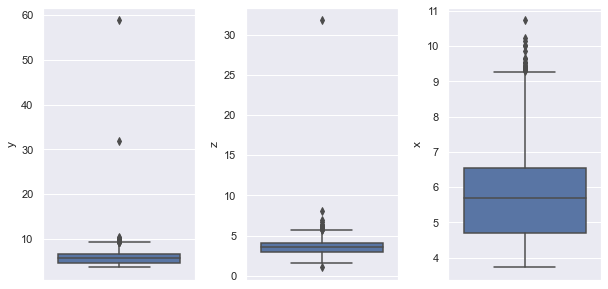

In [213]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
sns.boxplot(y=diamonds.x, ax=ax[2])
plt.subplots_adjust(wspace=0.33)

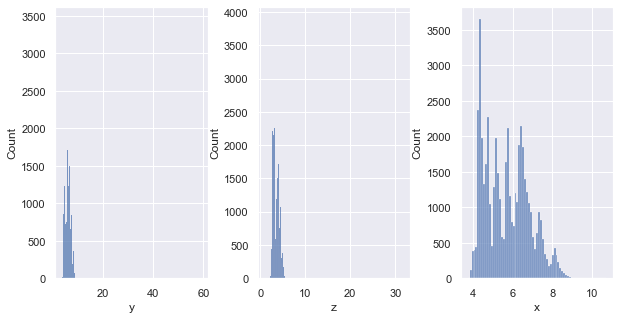

In [214]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.histplot(diamonds['y'], ax=ax[0])
sns.histplot(diamonds['z'], ax=ax[1])
sns.histplot(diamonds['x'], ax=ax[2])
plt.subplots_adjust(wspace=0.33)

Outliers for 'y'

In [215]:
diamonds[diamonds['y']>20]

,carat,cut,color,clarity,depth,table,price,x,y,z
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


We can calculate the real 'y' using the other measures

In [216]:
diamonds.loc[21828, 'y'] = round((200*diamonds.loc[21828, 'z']/diamonds.loc[21828, 'depth'])-diamonds.loc[21828, 'x'], 2)
diamonds.loc[44603, 'y'] = round((200*diamonds.loc[44603, 'z']/diamonds.loc[44603, 'depth'])-diamonds.loc[44603, 'x'], 2)
print(diamonds.loc[21828, 'y'], diamonds.loc[44603, 'y'])

19.28 11.42


Outliers for 'z'

In [217]:
diamonds[diamonds['z']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z
43882,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [218]:
diamonds.loc[43882, 'z'] = round(diamonds.loc[43882, 'depth']*(diamonds.loc[43882, 'x']+diamonds.loc[43882, 'y'])/200, 2)
print(diamonds.loc[43882, 'z'])

3.17


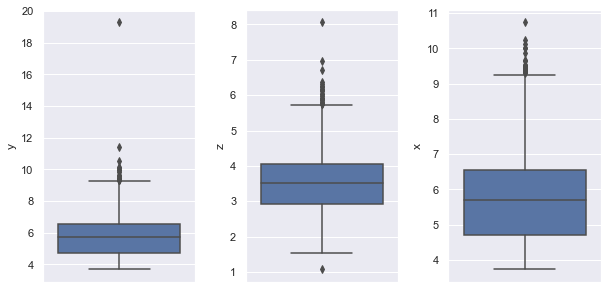

In [219]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
sns.boxplot(y=diamonds.x, ax=ax[2])
plt.subplots_adjust(wspace=0.33)

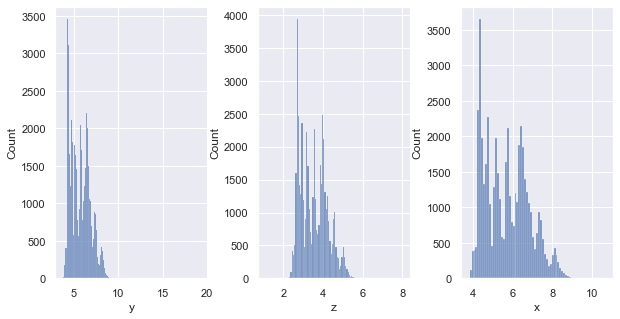

In [220]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.histplot(diamonds['y'], ax=ax[0])
sns.histplot(diamonds['z'], ax=ax[1])
sns.histplot(diamonds['x'], ax=ax[2])
plt.subplots_adjust(wspace=0.33)

In [221]:
diamonds[diamonds['y']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.28,8.06
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,11.42,5.12


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

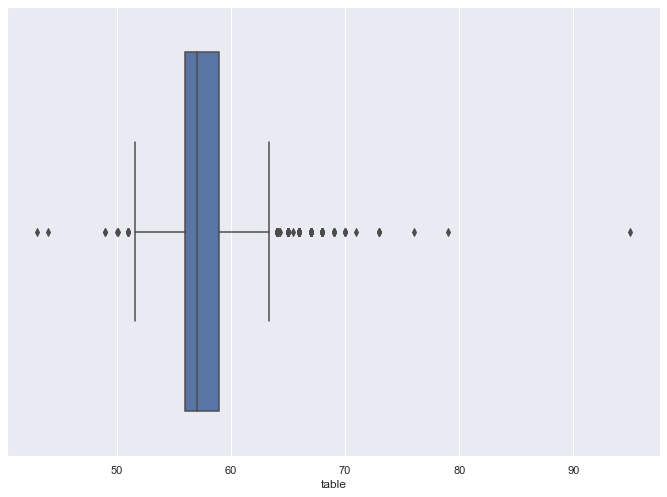

In [222]:
sns.boxplot(diamonds['table'])

In [223]:
diamonds_stats = diamonds.describe().T
diamonds_stats

,count,mean,std,min,25%,50%,75%,max
carat,48933.0,0.797748,0.474093,0.20,0.40,0.70,1.04,5.01
depth,48933.0,61.751904,1.429933,43.00,61.00,61.80,62.50,79.00
table,48933.0,57.451041,2.232986,43.00,56.00,57.00,59.00,95.00
price,48933.0,3933.641592,3988.524750,326.00,949.00,2401.00,5331.00,18823.00
x,48933.0,5.731532,1.119905,3.73,4.71,5.69,6.54,10.74
y,48933.0,5.733792,1.113872,3.68,4.72,5.71,6.54,19.28
z,48933.0,3.539596,0.692143,1.07,2.91,3.52,4.04,8.06


In [224]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [225]:
for column in diamonds[['depth', 'table', 'x', 'y', 'z']]:
    diamonds = diamonds[(diamonds[column] < diamonds_stats.loc[column, 'mean']+diamonds_stats.loc[column, 'std']*3)&(diamonds[column] > diamonds_stats.loc[column, 'mean']-diamonds_stats.loc[column, 'std']*3)]

In [226]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48030.0,0.792256,0.467904,0.20,0.40,0.70,1.04,2.80
depth,48030.0,61.749621,1.271735,57.50,61.10,61.80,62.50,66.00
table,48030.0,57.380256,2.101821,51.00,56.00,57.00,59.00,64.00
price,48030.0,3921.322007,3983.528952,326.00,942.00,2386.00,5330.00,18823.00
x,48030.0,5.719777,1.115507,3.73,4.70,5.69,6.54,9.08
y,48030.0,5.722894,1.108231,3.68,4.71,5.70,6.53,9.01
z,48030.0,3.532446,0.687962,1.53,2.90,3.52,4.03,5.61


# 4. EDA

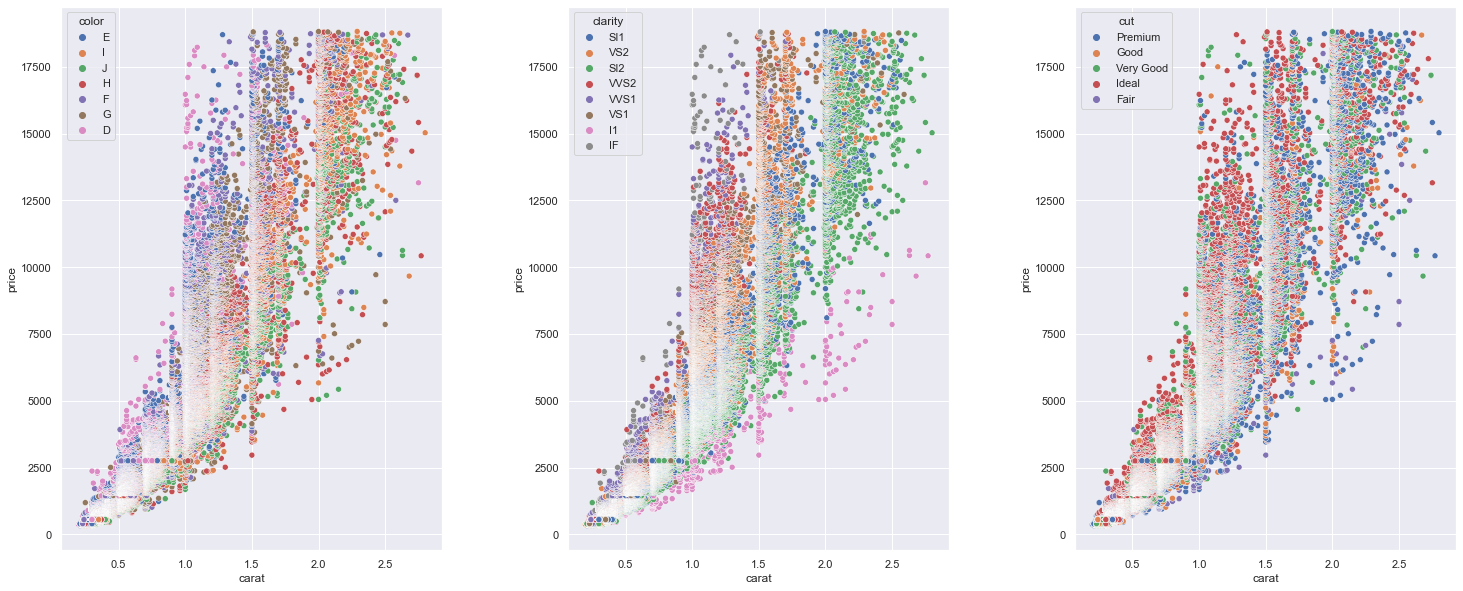

In [227]:
fig, ax = plt.subplots(1,3, figsize=(25, 10))
sns.scatterplot(data=diamonds, x='carat', y='price', hue='color', ax=ax[0])
sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity', ax=ax[1])
sns.scatterplot(data=diamonds, x='carat', y='price', hue='cut', ax=ax[2])
plt.subplots_adjust(wspace=0.33)
#sns.scatterplot(data=diamonds, x='carat', y='price', hue='color',size='clarity', style='cut', alpha=0.5)

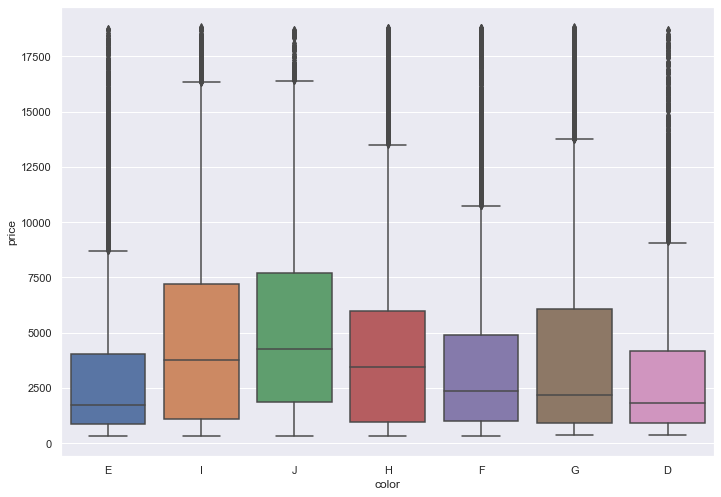

In [228]:
sns.boxplot(data = diamonds, x = 'color', y = 'price');

In [229]:
def clarity(x):
    if x == 'I1':
        x = 0
    elif x == 'SI2':
        x = 1
    elif x == 'SI1':
        x = 2
    elif x == 'VS2':
        x = 3
    elif x == 'VS1':
        x = 4
    elif x == 'VVS2':
        x = 5
    elif x == 'VVS1':
        x = 6
    elif x == 'IF':
        x = 7
    return x
diamonds['clarity_1'] = diamonds['clarity'].map(clarity)

def color(x):
    if x == 'J':
        x = 0
    elif x == 'I':
        x = 1
    elif x == 'H':
        x = 2
    elif x == 'G':
        x = 3
    elif x == 'F':
        x = 4
    elif x == 'E':
        x = 5
    elif x == 'D':
        x = 6
    return x
diamonds['color_1'] = diamonds['color'].map(color)

def cut(x):
    if x == 'Fair':
        x=0
    elif x == 'Good':
        x = 1
    elif x == 'Very Good':
        x = 2
    elif x == 'Premium':
        x = 3
    elif x == 'Ideal':
        x = 4
    return x
diamonds['cut_1'] = diamonds['cut'].map(cut)

# 5. Linear Regression

In [230]:
X = sm.add_constant(diamonds[['carat', 'cut_1', 'color_1', 'clarity_1']])
y = diamonds['price']
modelo = sm.OLS(y, X)

lm_fit = modelo.fit()
lm_fit.summary()

c:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.236e+05
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:53:39   Log-Likelihood:            -4.0810e+05
No. Observations:               48030   AIC:                         8.162e+05
Df Residuals:                   48025   BIC:                         8.163e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6205.3488     28.072   -221.047      0.000   -6260.371   -6150.326
carat       8899.5796     13.046    682.176      0.000    8874.010    8925.150
cut_1        127.4124      5.156     24.713      0.000     117.307     137.518
color_1      321.2682      3.363     95.530      0.000     314.677     327.860
clarity_1    521.7521      3.589    145.395      0.000     514.719     528.786
==============================================================================
Omnibus:                    10517.754   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58456.070
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
diamonds['lm_pred'] = lm_fit.predict()

<AxesSubplot:xlabel='carat', ylabel='lm_pred'>

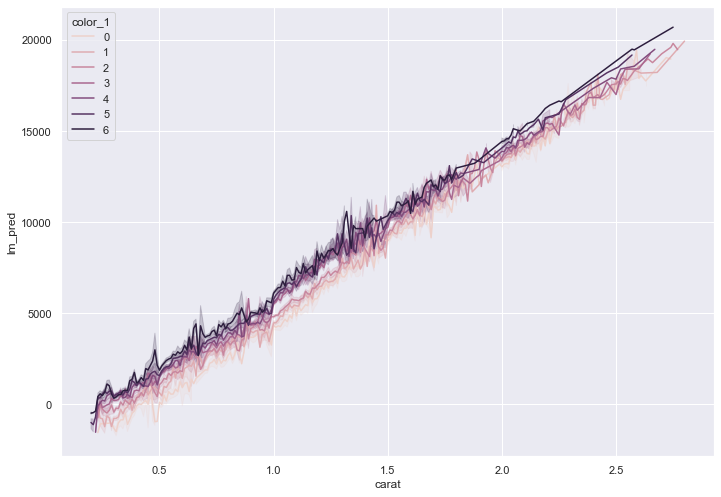

In [232]:
sns.color_palette('vlag', as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = diamonds, x = 'carat', y='lm_pred', hue = 'color_1')
#sns.scatterplot(data = diamonds, x = 'carat', y='price', hue = 'cut_1')

In [233]:
diamonds.sort_values(by='lm_pred')

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_1,color_1,cut_1,lm_pred
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1,-2797.314554
25326,0.31,Very Good,J,SI2,63.3,58.0,430,4.35,4.34,2.75,1,0,2,-2669.902130
53,0.30,Premium,J,SI2,59.3,61.0,405,4.43,4.38,2.61,1,0,3,-2631.485503
18,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71,1,1,1,-2565.042116
28672,0.30,Very Good,I,SI2,63.3,56.0,450,4.30,4.26,2.71,1,1,2,-2437.629692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24795,2.57,Premium,D,SI2,58.9,58.0,17924,8.99,8.94,5.28,1,6,3,19498.169674
24530,2.74,Very Good,H,SI2,63.3,58.0,17184,8.88,8.84,5.61,1,2,2,19598.612850
23696,2.75,Premium,H,SI2,60.5,61.0,15415,8.99,8.97,5.48,1,2,3,19815.021070
23487,2.80,Premium,I,SI2,61.1,59.0,15030,9.03,8.98,5.50,1,1,3,19938.731817


In [234]:
X_test.sort_values(by='erro2')

,const,carat,cut_1,color_1,clarity_1,pred_avg_price,real_avg_price,erro2
33883,1.0,0.40,2,4,4,981.940813,982,0.059187
33885,1.0,0.40,2,4,4,981.940813,982,0.059187
14979,1.0,1.02,4,2,5,6613.080939,6613,0.080939
13776,1.0,1.00,3,3,4,6114.646769,6115,0.353231
40890,1.0,0.52,3,4,3,1650.245858,1651,0.754142
...,...,...,...,...,...,...,...,...
24161,1.0,1.00,4,6,7,8747.937234,16469,7721.062766
18382,1.0,2.50,0,3,0,17003.946511,8711,8292.946511
25084,1.0,1.50,2,3,3,9917.307425,18691,8773.692575
24790,1.0,1.07,2,6,7,9128.127770,17909,8780.872230


# 7. Predicting Prices

In [235]:
diamon_pred = pd.read_csv('data/asset-v1_IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

In [236]:
def clarity(x):
    if x == 'I1':
        x = 0
    elif x == 'SI2':
        x = 1
    elif x == 'SI1':
        x = 2
    elif x == 'VS2':
        x = 3
    elif x == 'VS1':
        x = 4
    elif x == 'VVS2':
        x = 5
    elif x == 'VVS1':
        x = 6
    elif x == 'IF':
        x = 7
    return x
diamon_pred['clarity_1'] = diamon_pred['clarity'].map(clarity)

def color(x):
    if x == 'J':
        x = 0
    elif x == 'I':
        x = 1
    elif x == 'H':
        x = 2
    elif x == 'G':
        x = 3
    elif x == 'F':
        x = 4
    elif x == 'E':
        x = 5
    elif x == 'D':
        x = 6
    return x
diamon_pred['color_1'] = diamon_pred['color'].map(color)

def cut(x):
    if x == 'Fair':
        x=0
    elif x == 'Good':
        x = 1
    elif x == 'Very Good':
        x = 2
    elif x == 'Premium':
        x = 3
    elif x == 'Ideal':
        x = 4
    return x
diamon_pred['cut_1'] = diamon_pred['cut'].map(cut)

In [237]:
diamon_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_1,color_1,cut_1
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,1,2,2
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3,4,1
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3,2,4
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,3,4
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,1,3,4


In [238]:
diamon_pred['price_predicted'] = lm_fit.predict(X)
diamon_pred.sort_values(by='price_predicted').dropna()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_1,color_1,cut_1,price_predicted
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,3,4,-2797.314554
53,0.32,Premium,H,VS2,61.7,59.0,4.35,4.40,2.70,3,2,3,-2631.485503
18,0.92,Premium,F,SI1,61.8,59.0,6.21,6.25,3.85,2,4,3,-2565.042116
11,0.33,Ideal,G,VVS2,60.1,57.0,4.48,4.51,2.70,5,3,4,-2415.077282
16,0.30,Good,I,SI1,63.2,55.0,4.25,4.29,2.70,2,1,1,-2364.558221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,0.67,Good,G,VS2,57.5,60.1,5.78,5.83,3.34,3,3,1,8168.794398
3918,0.52,Very Good,E,SI1,59.3,59.0,5.26,5.30,3.13,2,5,2,8168.794398
3550,0.33,Very Good,D,VVS1,61.2,59.0,4.40,4.43,2.70,6,6,2,8324.233581
4889,0.76,Ideal,G,VVS2,62.0,56.0,5.86,5.88,3.64,5,3,4,8668.054225


In [243]:
diamonds_pred = diamon_pred.drop(['cut_1', 'color_1', 'clarity_1'], axis=1).dropna()

In [244]:
diamonds_pred.to_csv('data/diamonds_pred.csv')